In [1]:
import pandas as pd

In [3]:
df1 = pd.read_csv("202404-Cyclistic.csv")

In [5]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,day_of_week,ride_length,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1FAE97F15D20CEE6,electric_bike,4/24/24 7:33,4/24/24 7:33,4.0,31.0,Damen Ave & Cortland St,13133,Damen Ave & Cortland St,13133,41.915982,-87.677244,41.915983,-87.677335,member
1,A261455AC6AE0720,classic_bike,4/13/24 10:07,4/13/24 10:08,7.0,31.0,University Ave & 57th St,KA1503000071,University Ave & 57th St,KA1503000071,41.791478,-87.599861,41.791478,-87.599861,member
2,708D7EACB8D329D2,electric_bike,4/27/24 14:08,4/27/24 14:09,7.0,31.0,Clark St & Leland Ave,TA1309000014,Clark St & Leland Ave,TA1309000014,41.967186,-87.667456,41.967088,-87.667291,casual
3,CB14369547B84BB0,electric_bike,4/13/24 14:05,4/13/24 14:06,7.0,31.0,Dusable Harbor,KA1503000064,Dusable Harbor,KA1503000064,41.886877,-87.612840,41.886976,-87.612813,casual
4,6DF9AFDF095702F1,classic_bike,4/21/24 16:53,4/21/24 16:53,1.0,31.0,MLK Jr Dr & 29th St,TA1307000139,MLK Jr Dr & 29th St,TA1307000139,41.842052,-87.617000,41.842052,-87.617000,casual


In [7]:
import matplotlib.pyplot as plt

In [9]:
df1_weekday_count = df1[['day_of_week','member_casual']].value_counts()

In [11]:
df1_weekday_count.head(14)

day_of_week  member_casual
3.0          member           54428
2.0          member           49211
7.0          member           37327
5.0          member           36681
4.0          member           36434
6.0          member           33977
1.0          member           30840
7.0          casual           30259
1.0          casual           24805
2.0          casual           19538
3.0          casual           18792
6.0          casual           13943
4.0          casual           11041
5.0          casual           10799
Name: count, dtype: int64

In [13]:
weekday_count_df = df1_weekday_count.reset_index()
weekday_count_df.columns = ['day_of_week', 'member_casual' , 'count']
weekday_count_df.head(15)

,day_of_week,member_casual,count
0,3.0,member,54428
1,2.0,member,49211
2,7.0,member,37327
3,5.0,member,36681
4,4.0,member,36434
5,6.0,member,33977
6,1.0,member,30840
7,7.0,casual,30259
8,1.0,casual,24805
9,2.0,casual,19538


In [15]:
pivot_df1 = weekday_count_df.pivot_table(index='day_of_week' , columns='member_casual' , values='count')
pivot_df1

member_casual,casual,member
day_of_week,,
1.0,24805.0,30840.0
2.0,19538.0,49211.0
3.0,18792.0,54428.0
4.0,11041.0,36434.0
5.0,10799.0,36681.0
6.0,13943.0,33977.0
7.0,30259.0,37327.0


In [17]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_df1['weekday'] = weekday

<Axes: xlabel='weekday'>

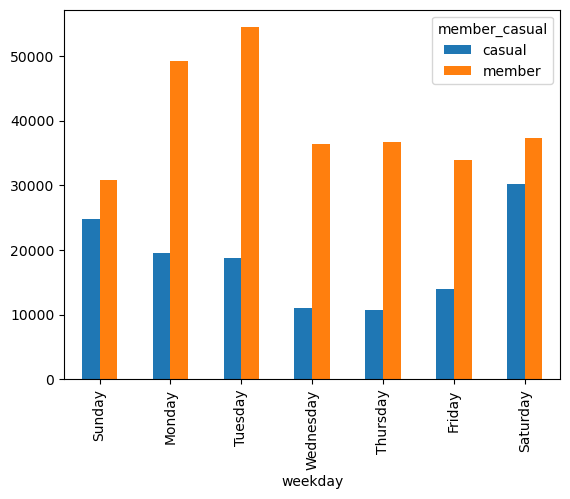

In [19]:
pivot_df1.plot(kind='bar' , x='weekday')

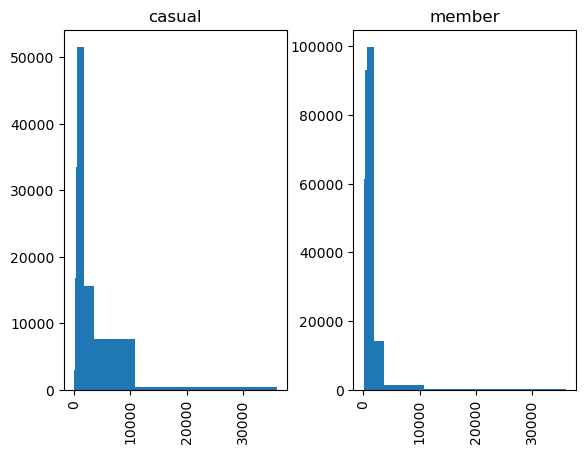

In [21]:
df1.hist(column='ride_length', bins=[30,120,300,600,1800,3600,10800,36000], by='member_casual')
plt.show()

In [23]:
df1_weekday_bike_membership = df1[['day_of_week','member_casual' , 'rideable_type']].value_counts()

In [25]:
weekday_bike_membership = df1_weekday_bike_membership.reset_index()

In [27]:
weekday_bike_membership.columns = ['day_of_week' , 'member_casual' , 'rideable_type' , 'count']

In [29]:
pivot_wbm = weekday_bike_membership.pivot_table(index = 'day_of_week' , columns = ['member_casual' , 'rideable_type'] , values = 'count')

In [31]:
weekday=['Sunday' , 'Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday'] 
pivot_wbm['weekday'] = weekday

<Axes: xlabel='weekday'>

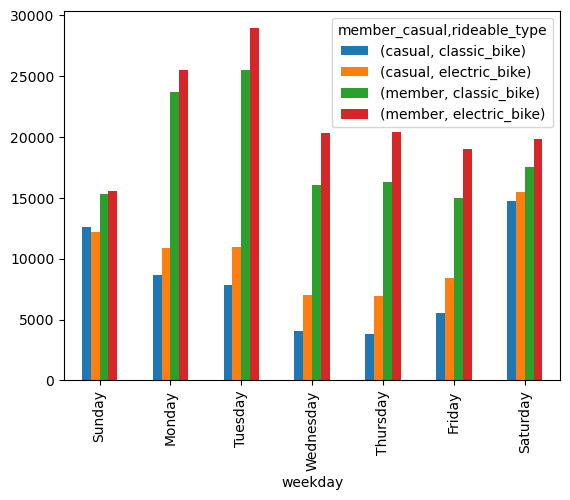

In [33]:
pivot_wbm.plot(kind = 'bar' , x='weekday')

In [35]:
import folium

In [37]:
from folium.plugins import HeatMap

In [39]:
m = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)


In [41]:
member_geo_data = df1[df1['member_casual']=='member']
member_geo_data = member_geo_data[['start_lat' , 'start_lng']]

In [43]:
member_geo_data.head()

,start_lat,start_lng
0,41.915982,-87.677244
1,41.791478,-87.599861
5,41.889177,-87.638506
7,41.910558,-87.689599
8,41.891208,-87.626730


In [45]:
HeatMap(member_geo_data).add_to(m)

In [47]:
m.save('heatmapmember-April.html')

In [49]:
casual_geo_data = df1[df1['member_casual']=='casual']
casual_geo_route = casual_geo_data[['start_lat' , 'start_lng' , 'end_lat' , 'end_lng']]
casual_geo_data = casual_geo_data[['start_lat' , 'start_lng']]

In [51]:
m1 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [53]:
HeatMap(casual_geo_data).add_to(m1)

In [55]:
m1.save('heatmapcasual-April.html')

In [57]:
m2 = folium.Map(location=[42.50 , -82.50] , zoom_start = 5)

In [59]:
casual_geo_route.head()

,start_lat,start_lng,end_lat,end_lng
2,41.967186,-87.667456,41.967088,-87.667291
3,41.886877,-87.612840,41.886976,-87.612813
4,41.842052,-87.617000,41.842052,-87.617000
6,41.880941,-87.616777,41.880958,-87.616743
9,41.880958,-87.616743,41.880958,-87.616743


In [61]:
casual_geo_route = casual_geo_route.dropna()
for index in casual_geo_route.index:
    route = [[casual_geo_route.loc[index, 'start_lat'] ,casual_geo_route.loc[index,'start_lng']] , [casual_geo_route.loc[index,'end_lat'], casual_geo_route.loc[index,'end_lng']]] 
    folium.PolyLine(locations = route , color='blue' , weight=0.5 , opacity = 0.4).add_to(m2)

In [63]:
m2.save('routesCasual-April.html')